# Project 1 Notebook

## Introduction

This notebook contains all relevant code and annotation associated with completing the project's objective. For access to all data used, please refer to my GitHub page (https://github.com/Lucmeister55/MLLS_Project1).

## Raw data Import

We start by importing all raw datasets available to us.

### Test Dataset

First of all, test set data was downloaded from the kaggle competition page (https://www.kaggle.com/competitions/bicycle-counter-prediction/data) and read into memory here. These measurements represent only around 48% of the full test set, and are summed across every hour. Nevertheless, the test set encompasses the whole of the month of July 2023. The reduced test set size, time range and first few rows are listed below the chunk.

In [33]:
import pandas as pd
import numpy as np
import datetime

test_rawdata = pd.read_csv("input/bicycle-counter-prediction/test_data.csv")
print(test_rawdata.shape)
print(min(test_rawdata["Date_hour"]))
print(max(test_rawdata["Date_hour"]))
test_rawdata.head()

(744, 2)
2023-07-01T00
2023-07-31T23


,Id,Date_hour
0,0,2023-07-01T00
1,1,2023-07-01T01
2,2,2023-07-01T02
3,3,2023-07-01T03
4,4,2023-07-01T04


### Bycicle measurements

Bycicle measurements from all bike counters near enough to Coupure Links (and spanning a large enough temporal intersection with each other) were downloaded from the Ghent Open Data Portal (https://data.stad.gent/explore/?disjunctive.keyword&disjunctive.theme&sort=modified) and subsequently saved by year in the following chunk. These measurements will be used as our primary features in our model, as they share a similar scale and are linearly correlated with the response variable. Currently, these are expressed as the sum of cyclists passing every five minutes.

In [34]:
# read in data
coupurelinks_2021 = pd.read_csv("input/bicycle-counter-prediction/fietstelpaal-coupure-links-2021-gent.csv", sep = ";")
coupurelinks_2022 = pd.read_csv("input/bicycle-counter-prediction/fietstelpaal-coupure-links-2022-gent.csv", sep = ";")
coupurelinks_2023 = pd.read_csv("input/bicycle-counter-prediction/fietstelpaal-coupure-links-2023-gent.csv", sep = ";")

isabellakaai_2022 = pd.read_csv("input/bicycle-counter-prediction/fietstelpaal-isabellakaai-2022-gent.csv", sep = ";")
isabellakaai_2023 = pd.read_csv("input/bicycle-counter-prediction/fietstelpaal-isabellakaai-2023-gent.csv", sep = ";")

zuidparklaan_2021 = pd.read_csv("input/bicycle-counter-prediction/fietstelpaal-zuidparklaan-2021-gent.csv", sep = ";")
zuidparklaan_2022 = pd.read_csv("input/bicycle-counter-prediction/fietstelpaal-zuidparklaan-2022-gent.csv", sep = ";")
zuidparklaan_2023 = pd.read_csv("input/bicycle-counter-prediction/fietstelpaal-zuidparklaan-2023-gent.csv", sep = ";")

visserij_2022 = pd.read_csv("input/bicycle-counter-prediction/fietstelpaal-visserij-2022-gent.csv", sep = ";")
visserij_2023 = pd.read_csv("input/bicycle-counter-prediction/fietstelpaal-visserij-2023-gent.csv", sep = ";")

groendreef_2021 = pd.read_csv("input/bicycle-counter-prediction/fietstelpaal-groendreef-2021-gent.csv", sep = ";")
groendreef_2022 = pd.read_csv("input/bicycle-counter-prediction/fietstelpaal-groendreef-2022-gent.csv", sep = ";")
groendreef_2023 = pd.read_csv("input/bicycle-counter-prediction/fietstelpaal-groendreef-2023-gent.csv", sep = ";")


Next, these measurements separated by year are concatenated into one comprehensive dataframe per location. Anyone reading this has every right to sue me for bad database management. The time ranges of each dataset are also printed underneath the chunk.

In [35]:
coupurelinks = pd.concat([coupurelinks_2021, coupurelinks_2022, coupurelinks_2023])
bicycle_data = coupurelinks.copy()
coupurelinks = coupurelinks.rename(columns = {"Totaal": "Totaal_CL"})
print("CL")
print(min(coupurelinks["Datum"]))
print(max(coupurelinks["Datum"]))

isabellakaai = pd.concat([isabellakaai_2022, isabellakaai_2023])
isabellakaai = isabellakaai.rename(columns = {"Totaal": "Totaal_IK"})
print("IK")
print(min(isabellakaai["Datum"]))
print(max(isabellakaai["Datum"]))

zuidparklaan = pd.concat([zuidparklaan_2021, zuidparklaan_2022, zuidparklaan_2023])
zuidparklaan = zuidparklaan.rename(columns = {"Totaal": "Totaal_ZPL"})
print("ZPL")
print(min(zuidparklaan["Datum"]))
print(max(zuidparklaan["Datum"]))

visserij = pd.concat([visserij_2022, visserij_2023])
visserij = visserij.rename(columns = {"Totaal": "Totaal_V"})
print("V")
print(min(visserij["Datum"]))
print(max(visserij["Datum"]))

groendreef = pd.concat([groendreef_2021, groendreef_2022, groendreef_2023])
groendreef = groendreef.rename(columns = {"Totaal": "Totaal_GD"})
print("GD")
print(min(groendreef["Datum"]))
print(max(groendreef["Datum"]))


CL
2021-03-01
2023-07-31
IK
2022-04-01
2023-07-31
ZPL
2021-01-01
2023-07-31
V
2022-01-01
2023-07-31
GD
2021-01-01
2023-07-31


Now we commit another database felony by merging all the dataframes into one big master measurement dataframe. We do this by intersect merging on the column describing the exact time of measurement. The final size, time range and first few rows of the resulting dataframe are displayed below the chunk.

In [36]:
bicycle_data = bicycle_data.merge(isabellakaai.loc[:, ["Ordening", "Totaal_IK"]], how = "inner")
bicycle_data = bicycle_data.merge(zuidparklaan.loc[:, ["Ordening", "Totaal_ZPL"]], how = "inner")
bicycle_data = bicycle_data.merge(visserij.loc[:, ["Ordening", "Totaal_V"]], how = "inner")
bicycle_data = bicycle_data.merge(groendreef.loc[:, ["Ordening", "Totaal_GD"]], how = "inner")

print(bicycle_data.shape)
print(min(bicycle_data["Datum"]))
print(max(bicycle_data["Datum"]))
print(bicycle_data.head())

(140616, 12)
2022-04-01
2023-07-31
  ﻿Code        Locatie       Datum Uur5Minuten                   Ordening  \
0   COU  Coupure-Links  2022-04-01     0:00:00  2022-04-01T00:00:00+02:00   
1   COU  Coupure-Links  2022-04-01     0:05:00  2022-04-01T00:05:00+02:00   
2   COU  Coupure-Links  2022-04-01     0:10:00  2022-04-01T00:10:00+02:00   
3   COU  Coupure-Links  2022-04-01     0:15:00  2022-04-01T00:15:00+02:00   
4   COU  Coupure-Links  2022-04-01     0:20:00  2022-04-01T00:20:00+02:00   

   Totaal  Tegenrichting  Hoofdrichting  Totaal_IK  Totaal_ZPL  Totaal_V  \
0    13.0            3.0           10.0          4         2.0         9   
1    14.0            9.0            5.0          2         3.0         9   
2    12.0            4.0            8.0         11         4.0        11   
3    14.0           10.0            4.0          4         1.0         5   
4     8.0            5.0            3.0          2         1.0         3   

   Totaal_GD  
0       10.0  
1        5.0  


Unfortunately, it seems that certain measurement are missing from the datasets downloaded, more specifically some measurements remaining from the Coupure Links ("Totaal") and Groendreef ("Totaal_GD). This is also mentioned in the corresponding browser overview pages of the database portal. Preprocessing of this data will thus be in order.

In [37]:
print(bicycle_data.isna().sum())

Code               0
Locatie             0
Datum               0
Uur5Minuten         0
Ordening            0
Totaal           4032
Tegenrichting    4032
Hoofdrichting    4032
Totaal_IK           0
Totaal_ZPL          0
Totaal_V            0
Totaal_GD        1440
dtype: int64


### Weather

Weather features are also likely to be correlated with an individual's likelihood to cycle, making this is an easy addition. This data was abtained from Open Meteo (https://open-meteo.com/en/docs/historical-weather-api#latitude=51.05&longitude=3.7167). Chosen features include the objective and apparent temperature, preicipation in mm (rain and snow), cloud cover at all altitudes, and whether a time point is considered day or nighttime. Of the 33576 rows in this dataset, 24 rows contain missing values. Since their fraction is little, and these time points don't belong to the range of our master measurement dataframe anyway, we instead simply remove these rows entirely rather than imputing them.

In [38]:
# read in data
weather_rawdata = pd.read_csv("input/bicycle-counter-prediction/open-meteo-51.07N3.71E13m.csv", skiprows=2).dropna()
print(weather_rawdata.shape)
weather_rawdata.head()

(33576, 9)


,time,temperature_2m (°C),apparent_temperature (°C),precipitation (mm),cloud_cover (%),cloud_cover_low (%),cloud_cover_mid (%),cloud_cover_high (%),is_day ()
0,2020-01-01T00:00,3.3,-0.1,0.0,44.0,49.0,0.0,0.0,0
1,2020-01-01T01:00,2.8,-0.6,0.0,17.0,19.0,0.0,0.0,0
2,2020-01-01T02:00,2.5,-1.0,0.0,10.0,11.0,0.0,0.0,0
3,2020-01-01T03:00,1.9,-1.6,0.0,3.0,3.0,0.0,0.0,0
4,2020-01-01T04:00,1.4,-2.2,0.0,0.0,0.0,0.0,0.0,0


### School Holidays

It is reasonable to assume that the school holidays of the lower academic institutes (primary and secondary school) will have an impact on the activity of cyclists in the region. After all, there is a school just across the river from the bike counter in question. During holidays, less students and potentially their parents will travel past this location.

In [39]:
school_holidays_data = pd.read_csv("input/bicycle-counter-prediction/school_holidays.csv", sep = ";")

import datetime
school_holidays = {}
for index, row in school_holidays_data.iterrows():
    school_holidays[row['name']] = [datetime.datetime.strptime(row['start'], '%Y-%m-%d'), datetime.datetime.strptime(row['end'], '%Y-%m-%d')]
print(school_holidays)

{'Christmas holiday 2020': [datetime.datetime(2020, 12, 21, 0, 0), datetime.datetime(2021, 1, 3, 0, 0)], 'Spring break 2021': [datetime.datetime(2021, 2, 15, 0, 0), datetime.datetime(2021, 2, 21, 0, 0)], 'Easter holiday 2021': [datetime.datetime(2021, 4, 5, 0, 0), datetime.datetime(2021, 4, 18, 0, 0)], 'Summer holiday 2021': [datetime.datetime(2021, 7, 1, 0, 0), datetime.datetime(2021, 8, 31, 0, 0)], 'Autumn break 2021': [datetime.datetime(2021, 11, 1, 0, 0), datetime.datetime(2021, 11, 7, 0, 0)], 'Christmas holiday 2021': [datetime.datetime(2021, 12, 27, 0, 0), datetime.datetime(2022, 1, 9, 0, 0)], 'Spring break 2022': [datetime.datetime(2022, 2, 28, 0, 0), datetime.datetime(2022, 3, 6, 0, 0)], 'Easter holiday 2022': [datetime.datetime(2022, 4, 4, 0, 0), datetime.datetime(2022, 4, 18, 0, 0)], 'Summer holiday 2022': [datetime.datetime(2022, 7, 1, 0, 0), datetime.datetime(2022, 8, 31, 0, 0)], 'Autumn break 2022': [datetime.datetime(2022, 10, 31, 0, 0), datetime.datetime(2022, 11, 6, 0, 

### Public holidays

Plenty of people cycle to their work. During public holidays, their contribution to the counter will surely decrease.

In [40]:
import holidays
belgian_holidays = holidays.Belgium(years=[2021, 2022, 2023])
print(belgian_holidays)

{datetime.date(2021, 1, 1): 'Nieuwjaar', datetime.date(2021, 4, 4): 'Pasen', datetime.date(2021, 4, 5): 'Paasmaandag', datetime.date(2021, 5, 1): 'Dag van de Arbeid', datetime.date(2021, 5, 13): 'O. L. H. Hemelvaart', datetime.date(2021, 5, 23): 'Pinksteren', datetime.date(2021, 5, 24): 'Pinkstermaandag', datetime.date(2021, 7, 21): 'Nationale feestdag', datetime.date(2021, 8, 15): 'O. L. V. Hemelvaart', datetime.date(2021, 11, 1): 'Allerheiligen', datetime.date(2021, 11, 11): 'Wapenstilstand', datetime.date(2021, 12, 25): 'Kerstmis', datetime.date(2022, 1, 1): 'Nieuwjaar', datetime.date(2022, 4, 17): 'Pasen', datetime.date(2022, 4, 18): 'Paasmaandag', datetime.date(2022, 5, 1): 'Dag van de Arbeid', datetime.date(2022, 5, 26): 'O. L. H. Hemelvaart', datetime.date(2022, 6, 5): 'Pinksteren', datetime.date(2022, 6, 6): 'Pinkstermaandag', datetime.date(2022, 7, 21): 'Nationale feestdag', datetime.date(2022, 8, 15): 'O. L. V. Hemelvaart', datetime.date(2022, 11, 1): 'Allerheiligen', datetim

## Mundane data preprocessing

### Bicycle measurements

To solve the problem of missing values, these entries will be imputed using a simple imputer, which replaces missing values using a descriptive statistic along each column (in this case, the mean of that column). Furthermore, the measurements are transformed to instead be summed across every hour to be in line with the test set.

In [41]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

bicycle_data["Date_hour"] = bicycle_data['Ordening'].str.extract(r'^(.*?T\d{2})..')

imputer = SimpleImputer()
bicycle_imputed = imputer.fit_transform(bicycle_data.filter(regex='^Totaal', axis=1))
bicycle_data[bicycle_data.filter(regex='^Totaal', axis=1).columns] = bicycle_imputed

bicycle_data = bicycle_data.groupby(['Datum', 'Date_hour']).agg({'Totaal': 'sum', 'Totaal_IK': "sum", 
                                                                 'Totaal_ZPL': "sum", 'Totaal_V': "sum",
                                                                 'Totaal_GD': "sum"}).reset_index()
print(bicycle_data.shape)
print(min(bicycle_data["Date_hour"]))
print(max(bicycle_data["Date_hour"]))

bicycle_data.head()

(11687, 7)
2022-04-01T00
2023-07-31T23


,Datum,Date_hour,Totaal,Totaal_IK,Totaal_ZPL,Totaal_V,Totaal_GD
0,2022-04-01,2022-04-01T00,137.0,57.0,25.0,72.0,63.0
1,2022-04-01,2022-04-01T01,89.0,36.0,16.0,28.0,26.0
2,2022-04-01,2022-04-01T02,49.0,24.0,12.0,22.0,21.0
3,2022-04-01,2022-04-01T03,41.0,24.0,6.0,5.0,13.0
4,2022-04-01,2022-04-01T04,48.0,14.0,7.0,17.0,11.0


As we can see, there are no longer any missing values present in the dataset after imputation.

In [42]:
print(bicycle_data.isna().sum())

Datum         0
Date_hour     0
Totaal        0
Totaal_IK     0
Totaal_ZPL    0
Totaal_V      0
Totaal_GD     0
dtype: int64


The idea of including measurements from multiple bike counters is a huge advantage (as will become more clear later on). However, due to the necessity of taking their common intersect, we lose quite a lot of time points from our response, namely all of 2021 and a portion of 2022. To still incorporate this otherwise wasted resource in some way, and to capture certain temporal effects, we will add measurement columns derived from the Coupure Links response ("Totaal") lagged by one hour, one day and one year with respect to the time points of the main dataframe. Once again, imputation of missing values will have to be performed, both on the raw Coupure Links dataset, as well as the lagged variables (since there is no lagged data for e.g., 2020).

In [43]:
coupurelinks["Date_hour"] = coupurelinks['Ordening'].str.extract(r'^(.*?T\d{2})..')

imputer = SimpleImputer()
coupurelinks_imputed = imputer.fit_transform(coupurelinks.filter(regex='^Totaal', axis=1))
coupurelinks[coupurelinks.filter(regex='^Totaal', axis=1).columns] = coupurelinks_imputed

coupurelinks = coupurelinks.groupby(['Datum', 'Date_hour']).agg({'Totaal_CL': "sum"}).reset_index()
coupurelinks = coupurelinks.set_index(pd.DatetimeIndex(coupurelinks['Date_hour']))

coupurelinks['LaggedTotaal_CL_hour'] = coupurelinks['Totaal_CL'].shift(1)
coupurelinks['LaggedTotaal_CL_day'] = coupurelinks['Totaal_CL'].shift(freq="D")
coupurelinks['LaggedTotaal_CL_year'] = coupurelinks['Totaal_CL'].shift(freq=pd.DateOffset(years=1))
coupurelinks = coupurelinks.reset_index(drop = True)
coupurelinks.head()

bicycle_data = bicycle_data.merge(coupurelinks.loc[:, ["Date_hour", 'LaggedTotaal_CL_hour', 'LaggedTotaal_CL_day', 'LaggedTotaal_CL_year']], how = "inner", on = "Date_hour")

imputer = SimpleImputer()
bicycle_imputed = imputer.fit_transform(bicycle_data.filter(regex='^Lagged', axis=1))
bicycle_data[bicycle_data.filter(regex='^Lagged', axis=1).columns] = bicycle_imputed

bicycle_data.head()

,Datum,Date_hour,Totaal,Totaal_IK,Totaal_ZPL,Totaal_V,Totaal_GD,LaggedTotaal_CL_hour,LaggedTotaal_CL_day,LaggedTotaal_CL_year
0,2022-04-01,2022-04-01T00,137.0,57.0,25.0,72.0,63.0,214.0,125.0,34.0
1,2022-04-01,2022-04-01T01,89.0,36.0,16.0,28.0,26.0,137.0,103.0,6.0
2,2022-04-01,2022-04-01T02,49.0,24.0,12.0,22.0,21.0,89.0,66.0,2.0
3,2022-04-01,2022-04-01T03,41.0,24.0,6.0,5.0,13.0,49.0,54.0,8.0
4,2022-04-01,2022-04-01T04,48.0,14.0,7.0,17.0,11.0,41.0,68.0,13.0


Lo and behold, no more missing values.

In [44]:
print(bicycle_data.isna().sum())

Datum                   0
Date_hour               0
Totaal                  0
Totaal_IK               0
Totaal_ZPL              0
Totaal_V                0
Totaal_GD               0
LaggedTotaal_CL_hour    0
LaggedTotaal_CL_day     0
LaggedTotaal_CL_year    0
dtype: int64


### Weather

In [45]:
from datetime import timedelta

weather_data = weather_rawdata.copy()
weather_data.columns = weather_data.columns.str.split(' ').str[0]
weather_data["Date_hour"] = weather_data["time"].str.split(':', expand = True)[0]
weather_data = weather_data.drop("time", axis = 1)

weather_data = weather_data[(min(bicycle_data["Date_hour"]) <= weather_data['Date_hour']) & (weather_data['Date_hour'] <= max(test_rawdata["Date_hour"]))]
date_time = pd.to_datetime(weather_data['Date_hour'])
weather_data["date_dt"] = date_time.dt.date
weather_data["date"] = date_time.dt.strftime("%Y-%m-%d")
weather_data["month_day"] = date_time.dt.strftime("%m-%d")

print(weather_data.shape)
print(min(weather_data["Date_hour"]))
print(max(weather_data["Date_hour"]))
weather_data.head()

(11688, 12)
2022-04-01T00
2023-07-31T23


,temperature_2m,apparent_temperature,precipitation,cloud_cover,cloud_cover_low,cloud_cover_mid,cloud_cover_high,is_day,Date_hour,date_dt,date,month_day
19704,1.6,-3.4,0.2,86.0,78.0,27.0,0.0,0,2022-04-01T00,2022-04-01,2022-04-01,04-01
19705,1.1,-4.6,0.5,100.0,91.0,34.0,0.0,0,2022-04-01T01,2022-04-01,2022-04-01,04-01
19706,0.8,-4.9,0.6,98.0,97.0,17.0,0.0,0,2022-04-01T02,2022-04-01,2022-04-01,04-01
19707,0.7,-5.1,0.6,100.0,100.0,15.0,2.0,0,2022-04-01T03,2022-04-01,2022-04-01,04-01
19708,0.5,-5.3,0.7,100.0,99.0,58.0,32.0,0,2022-04-01T04,2022-04-01,2022-04-01,04-01


### Feature engineering

Using the raw data available to us, we will now engineer new features that will improve our model's performance. In this particular chunk, this includes:
- Day of the week (str): Some days will tend to diplay higher cycling activity, such as Mondays.
- Hour of the day (int) + sine & cosine transform (float): More people will cycle during the day compared to at night, at the start of the working day versus lunchtime, etc.
- Month of the year (int & str): The summer months will likely display less cycling activity than the others due to holidays, festivals, verlof, etc.
- Season (str): Same reasoning as the month of the year, but less granular.
- Date of the previous and following days (datetime): Necessary for inference of bridge days later on, not considered a feature.

In [46]:
import calendar
feature_data = weather_data.copy()
feature_data['weekday'] = date_time.dt.strftime('%A')

feature_data['hour'] = date_time.dt.hour
feature_data['hour_sin'] = np.sin(2 * np.pi * (feature_data['hour']) / 24)
feature_data['hour_cosin'] = np.cos(2 * np.pi * (feature_data['hour']) / 24)

feature_data["month"] = date_time.dt.month
feature_data['month_name'] = feature_data['month'].apply(lambda x: calendar.month_name[x])

def get_season(date):
    month = date.month
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Fall'
    else:
        return 'Winter'

feature_data['season'] = feature_data['date_dt'].apply(get_season)
feature_data['next_day'] = date_time + timedelta(days=1)
feature_data['prev_day'] = date_time - timedelta(days=1)

- Weekday boolean (log): More people will cycle during the weekdays to travel to their work or lessons.
- Weekend boolean (log): Captures the same variation as the previous boolean.
- School hour boolean (log): During school/working hours (roughly between 8 AM and 5 PM) cycling activity will be higher, as people tend to rest more outside of these hours.
- University lessons boolean (log): Due to the proximity of the Coupure Links bike counter to the Bio-Engineering campus, and the generally high population of students in Ghent, cycling activity should skyrocket while the 24 weeks of university lessons are ongoing and equally diminish during academic holidays and exam periods.
- Ghent event boolean (log): The occurence of major festivals in Ghent is likely to impact cycling activity, as this is correlated with likelihood to take time off work, appearance of roadblocks obstructing cyclists, etc. This is especially important for our particular test set, as the largest of all Ghent events, the Gentse Feesten, takes place towards the end of July.

In [47]:
# Function to check if a date falls within any interval
def date_in_intervals(dates, intervals):
    result = [0] * len(dates)  # Initialize the result list with 0s
    
    for i, date in enumerate(dates):
        for interval in intervals.values():
            start, end = interval[0], interval[1]
            if start <= date <= end:
                result[i] = 1
                break
    
    return result

university_lessons = {
    "sem1": ["09-26", "12-19"],
    "sem2_1": ["02-13", "04-02"],
    "sem2_2": ["04-17", "05-06"]
}

Ghent_event = {"gentsefeesten": ['07-14', '07-23']}

feature_data['is_weekday'] = (~feature_data['weekday'].isin(["Saturday", "Sunday"])).astype(int)
feature_data['is_weekend'] = (feature_data['weekday'].isin(["Saturday", "Sunday"])).astype(int)
feature_data['is_school_hours'] = ((date_time.dt.hour >= 8) & (date_time.dt.hour <= 17)).astype(int)
feature_data['is_university_lessons'] = date_in_intervals(feature_data["month_day"], university_lessons)
feature_data['is_Ghent_event'] = date_in_intervals(feature_data["month_day"], Ghent_event)

- Public holiday boolean (log): During public holidays, less people will travel to their work, thus decreasing cycling activity.
- Bridge day boolean (log): When a traditional working day is adjacent to any combination of a public holiday and weekend, many people take a bridge day, spending one of their holiday days to fully bridge the free period without interruption. This way, even "unofficial" holidays are accounted for.
- School holiday boolean (log): Less (young) students travelling means less cyclists.
- Bouwverlof boolean (log): The general business of the town should decrease while bouwverlof is ongoing, wihch is a long summer period when the construction sector pauses all projects. In a town such as Ghent, this is likely to have an impact, especially since it once again take place during July.

In [48]:
bouwverlof = {
    "summer": ["07-17", "08-07"],
}

feature_data['is_public_holiday'] = (date_time.dt.date.isin(belgian_holidays)).astype(int)
feature_data['is_bridge_day'] = (feature_data['weekday'].isin(["Monday", "Friday"]) & feature_data['next_day'].dt.date.isin(belgian_holidays) | feature_data['prev_day'].dt.date.isin(belgian_holidays)).astype(int)
is_school_holiday = [0] * len(date_time)
for i, check_date in enumerate(date_time):
    for holiday, date_range in school_holidays.items():
        start_date = date_range[0]
        end_date = date_range[1]
        if start_date <= check_date <= end_date:
            is_school_holiday[i] = 1
feature_data["is_school_holiday"] = is_school_holiday
feature_data['is_bouwverlof'] = date_in_intervals(feature_data["month_day"], bouwverlof)

This is our feature dataset so far. This is quite extensive already, but we can do better.

In [49]:
print(feature_data.shape)
feature_data.head()

(11688, 30)


,temperature_2m,apparent_temperature,precipitation,cloud_cover,cloud_cover_low,cloud_cover_mid,cloud_cover_high,is_day,Date_hour,date_dt,...,prev_day,is_weekday,is_weekend,is_school_hours,is_university_lessons,is_Ghent_event,is_public_holiday,is_bridge_day,is_school_holiday,is_bouwverlof
19704,1.6,-3.4,0.2,86.0,78.0,27.0,0.0,0,2022-04-01T00,2022-04-01,...,2022-03-31 00:00:00,1,0,0,1,0,0,0,0,0
19705,1.1,-4.6,0.5,100.0,91.0,34.0,0.0,0,2022-04-01T01,2022-04-01,...,2022-03-31 01:00:00,1,0,0,1,0,0,0,0,0
19706,0.8,-4.9,0.6,98.0,97.0,17.0,0.0,0,2022-04-01T02,2022-04-01,...,2022-03-31 02:00:00,1,0,0,1,0,0,0,0,0
19707,0.7,-5.1,0.6,100.0,100.0,15.0,2.0,0,2022-04-01T03,2022-04-01,...,2022-03-31 03:00:00,1,0,0,1,0,0,0,0,0
19708,0.5,-5.3,0.7,100.0,99.0,58.0,32.0,0,2022-04-01T04,2022-04-01,...,2022-03-31 04:00:00,1,0,0,1,0,0,0,0,0


Some of our features are still categorical string vectors. To make these interpretable to a mathematical model, we will encode these as dummie variables, more specifically the day of the week and the season.

In [50]:
dummies = pd.concat([pd.get_dummies(feature_data.weekday), pd.get_dummies(feature_data.season)], axis = 1)
dummies.head()

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Fall,Spring,Summer,Winter
19704,1,0,0,0,0,0,0,0,1,0,0
19705,1,0,0,0,0,0,0,0,1,0,0
19706,1,0,0,0,0,0,0,0,1,0,0
19707,1,0,0,0,0,0,0,0,1,0,0
19708,1,0,0,0,0,0,0,0,1,0,0


These dummie variables are then concatenated to our already huge feature set.

In [51]:
feature_data = pd.concat([feature_data, dummies], axis=1)
print(feature_data.shape)
feature_data.head()

(11688, 41)


,temperature_2m,apparent_temperature,precipitation,cloud_cover,cloud_cover_low,cloud_cover_mid,cloud_cover_high,is_day,Date_hour,date_dt,...,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Fall,Spring,Summer,Winter
19704,1.6,-3.4,0.2,86.0,78.0,27.0,0.0,0,2022-04-01T00,2022-04-01,...,0,0,0,0,0,0,0,1,0,0
19705,1.1,-4.6,0.5,100.0,91.0,34.0,0.0,0,2022-04-01T01,2022-04-01,...,0,0,0,0,0,0,0,1,0,0
19706,0.8,-4.9,0.6,98.0,97.0,17.0,0.0,0,2022-04-01T02,2022-04-01,...,0,0,0,0,0,0,0,1,0,0
19707,0.7,-5.1,0.6,100.0,100.0,15.0,2.0,0,2022-04-01T03,2022-04-01,...,0,0,0,0,0,0,0,1,0,0
19708,0.5,-5.3,0.7,100.0,99.0,58.0,32.0,0,2022-04-01T04,2022-04-01,...,0,0,0,0,0,0,0,1,0,0


The following code merges the master bicycle measurement dataframe with our feature conglomerate to get an initial train set. We take care to remove all trace of July 2023 from the result, as including this in the training set would be fraudulent.

In [52]:
all_data = feature_data.merge(bicycle_data, on = "Date_hour")
train_data = all_data[(all_data["Date_hour"] < min(test_rawdata["Date_hour"])) & (all_data["Date_hour"] > "2022")]

print(train_data.shape)
print(min(train_data["Date_hour"]))
print(max(train_data["Date_hour"]))
train_data.head()

(10943, 50)
2022-04-01T00
2023-06-30T23


,temperature_2m,apparent_temperature,precipitation,cloud_cover,cloud_cover_low,cloud_cover_mid,cloud_cover_high,is_day,Date_hour,date_dt,...,Winter,Datum,Totaal,Totaal_IK,Totaal_ZPL,Totaal_V,Totaal_GD,LaggedTotaal_CL_hour,LaggedTotaal_CL_day,LaggedTotaal_CL_year
0,1.6,-3.4,0.2,86.0,78.0,27.0,0.0,0,2022-04-01T00,2022-04-01,...,0,2022-04-01,137.0,57.0,25.0,72.0,63.0,214.0,125.0,34.0
1,1.1,-4.6,0.5,100.0,91.0,34.0,0.0,0,2022-04-01T01,2022-04-01,...,0,2022-04-01,89.0,36.0,16.0,28.0,26.0,137.0,103.0,6.0
2,0.8,-4.9,0.6,98.0,97.0,17.0,0.0,0,2022-04-01T02,2022-04-01,...,0,2022-04-01,49.0,24.0,12.0,22.0,21.0,89.0,66.0,2.0
3,0.7,-5.1,0.6,100.0,100.0,15.0,2.0,0,2022-04-01T03,2022-04-01,...,0,2022-04-01,41.0,24.0,6.0,5.0,13.0,49.0,54.0,8.0
4,0.5,-5.3,0.7,100.0,99.0,58.0,32.0,0,2022-04-01T04,2022-04-01,...,0,2022-04-01,48.0,14.0,7.0,17.0,11.0,41.0,68.0,13.0


The following performs the same merging action, but then for the test set:

In [53]:
test_data = test_rawdata.merge(feature_data, on = "Date_hour", how = 'left')
test_data = test_data.merge(bicycle_data, on = "Date_hour", how = 'left').drop("Totaal", axis = 1)
print(test_data.shape)
test_data.head()

(744, 50)


,Id,Date_hour,temperature_2m,apparent_temperature,precipitation,cloud_cover,cloud_cover_low,cloud_cover_mid,cloud_cover_high,is_day,...,Summer,Winter,Datum,Totaal_IK,Totaal_ZPL,Totaal_V,Totaal_GD,LaggedTotaal_CL_hour,LaggedTotaal_CL_day,LaggedTotaal_CL_year
0,0,2023-07-01T00,18.0,15.7,0.0,100.0,100.0,99.0,58.0,0,...,1,0,2023-07-01,54.0,59.0,151.0,116.0,208.0,139.0,96.0
1,1,2023-07-01T01,17.7,15.3,0.0,100.0,100.0,100.0,62.0,0,...,1,0,2023-07-01,29.0,56.0,128.0,72.0,150.0,94.0,41.0
2,2,2023-07-01T02,17.4,15.0,0.0,100.0,100.0,100.0,85.0,0,...,1,0,2023-07-01,36.0,44.0,54.0,42.0,92.0,69.0,17.0
3,3,2023-07-01T03,17.2,15.0,0.0,100.0,100.0,85.0,90.0,0,...,1,0,2023-07-01,9.0,44.0,55.0,27.0,49.0,54.0,49.0
4,4,2023-07-01T04,17.1,15.3,0.0,100.0,100.0,64.0,85.0,1,...,1,0,2023-07-01,18.0,19.0,24.0,22.0,36.0,68.0,37.0


Under normal predictive circumstances, we do not yet have access to the forecasting horizon data. However, in this case we do, so we will save the gold standard for July 2023 for comparison later. This essentially represents 100% of the true test set.

In [54]:
gtest_data = test_rawdata.merge(bicycle_data[["Totaal", "Date_hour"]], on = "Date_hour", how = 'left')
print(gtest_data.shape)
gtest_data.head()

(744, 3)


,Id,Date_hour,Totaal
0,0,2023-07-01T00,150.0
1,1,2023-07-01T01,92.0
2,2,2023-07-01T02,49.0
3,3,2023-07-01T03,36.0
4,4,2023-07-01T04,57.0


## Advanced preprocessing and setup

### Load packages

All packages necessary for the remainder of the pipeline are loaded in this chunk.

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, Normalizer
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.linear_model import Lasso, Ridge, LinearRegression, PoissonRegressor, TweedieRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor, ExtraTreesRegressor
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA


### Functions

In this section, several helper functions are defined for use later on.

#### Nested K-fold Cross-Validation

This function receives as inputs a model object, a grid of parameters, and a training set (features and response). These are then used to perform nested k-fold cross-validation. The k-fold cross-validation procedure is used to estimate the performance of machine learning models when making predictions on data not used during training.

This procedure can be used both when optimizing the hyperparameters of a model on a dataset, and when comparing and selecting a model for the dataset. When the same cross-validation procedure and dataset are used to both tune and select a model, it is likely to lead to an optimistically biased evaluation of the model performance.

One approach to overcoming this bias is to nest the hyperparameter optimization procedure under the model selection procedure. This is called double cross-validation or nested cross-validation and is the preferred way to evaluate and compare tuned machine learning models.

In the inner loop (here executed by GridSearchCV), the score is approximately maximized by fitting a model to each training set, and then directly maximized in selecting (hyper)parameters over the validation set. In the outer loop (here in cross_val_score), generalization error is estimated by averaging test set scores over several dataset splits. In this case, the number of splits in the inner loop and outer loop are defaulted to 5 and 3 respectively.

This function then returns the hyperparameter values that maximized model performance, as well as prints the mean score across all models.

In [56]:
def nested_kfold_cv(model_to_tune, param_grid, data, target):

    # Declare the inner and outer cross-validation strategies
    inner_cv = KFold(n_splits=5, shuffle=True, random_state=0)
    outer_cv = KFold(n_splits=3, shuffle=True, random_state=0)

    # Inner cross-validation for parameter search
    model = GridSearchCV(
        estimator=model_to_tune, param_grid=param_grid, cv=inner_cv, n_jobs=2, scoring = 'r2'
    )

    # Outer cross-validation to compute the testing score
    test_score = cross_val_score(model, data, target, cv=outer_cv, n_jobs=2)
    print(
        "The mean score using nested cross-validation is: "
        f"{test_score.mean():.3f} ± {test_score.std():.3f}"
    )

    model.fit(data, target)

    best_params = model.best_params_

    print(f"The best parameters found are: {best_params}")

    return best_params

#### Error Plot

Function that receives model predictions and gold standards of a training and test set, and (approximately) plots the logarithmic error between the true values and predicted values for both the training and test set.

In [57]:
def plot_diff(y_train, y_hat_train, y_test, y_hat_test):
    y_test_reset = y_test.reset_index()
    indices = y_test_reset.index.to_list()
    time = np.divide(indices, max(indices))*31
    logdiff_test = np.log10(y_hat_test - y_test)

    plt.plot(time, logdiff_test, 'bo')
    plt.xlabel('Day')
    plt.ylabel('log10(y_hat_test - y_test)')
    plt.grid(True)
    plt.show()

    y_train_reset = y_train.reset_index()
    indices = y_train_reset.index.to_list()
    time = np.divide(indices, max(indices))*6+1
    logdiff_train = np.log10(y_hat_train - y_train)

    plt.plot(time, logdiff_train, 'bo')
    plt.xlabel('Month')
    plt.ylabel('log10(y_hat_train - y_train)')
    plt.grid(True)
    plt.show()

Export predictions

This is a simple function that exports a given set of predictions to a ".csv" file, with a name based on the input string.

In [58]:
def save_predictions(model, test_data, y_hat_test):
    file = pd.DataFrame([test_data.loc[:, "Id"], y_hat_test]).T
    file.columns = ["Id", "Predicted"]
    file.to_csv("input/bicycle-counter-prediction/predictions/" + model + ".csv", index = False)

### Diagnostic plots

In this section, plots will be generated to guide further processing of the data, and to give us an idea of the existing relationships between features and the response variable.

#### Univariate density plot

A univariate density plot of the response variable is generated below. We can speculate that the graph resembles a skewed Poisson distribution. Since the measurements represent discrete count data, this is in line with our expectations.

<Axes: ylabel='Density'>

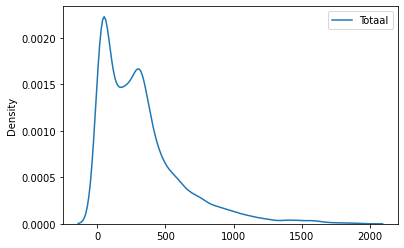

In [59]:
sns.kdeplot(train_data.loc[:,['Totaal']])

Next, we visualize the correlation between all numerical features and the response by use of a correlation matrix heatmap. Evidently, the bycicle measurements display the highest internal correlation, whilst most other relationships seems middling at best.

['temperature_2m', 'apparent_temperature', 'precipitation', 'cloud_cover', 'cloud_cover_low', 'cloud_cover_mid', 'cloud_cover_high', 'is_day', 'hour', 'hour_sin', 'hour_cosin', 'month', 'is_weekday', 'is_weekend', 'is_school_hours', 'is_university_lessons', 'is_Ghent_event', 'is_public_holiday', 'is_bridge_day', 'is_school_holiday', 'is_bouwverlof', 'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'Fall', 'Spring', 'Summer', 'Winter', 'Totaal_IK', 'Totaal_ZPL', 'Totaal_V', 'Totaal_GD', 'LaggedTotaal_CL_hour', 'LaggedTotaal_CL_day', 'LaggedTotaal_CL_year']


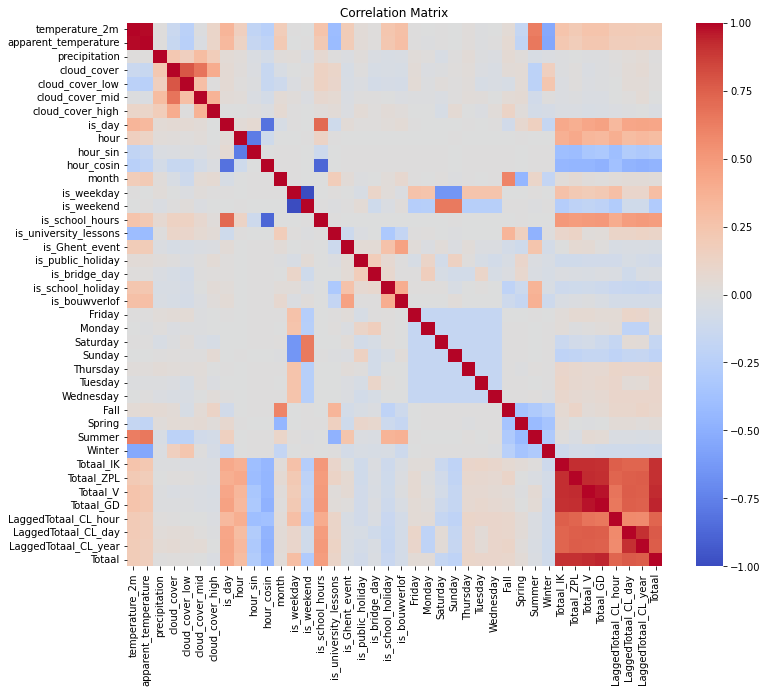

In [60]:
all_features = list(train_data.select_dtypes(include='number').columns)
elements_to_remove = ["Totaal"]
all_features = [feature for feature in all_features if feature not in elements_to_remove]
print(all_features)

cormat = train_data.loc[:, all_features + ["Totaal"]].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(cormat, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#### Pairwise Plot: Bicycle Measurements

Indeed, the bicycle measurements are more or less linearly correlated with one another.

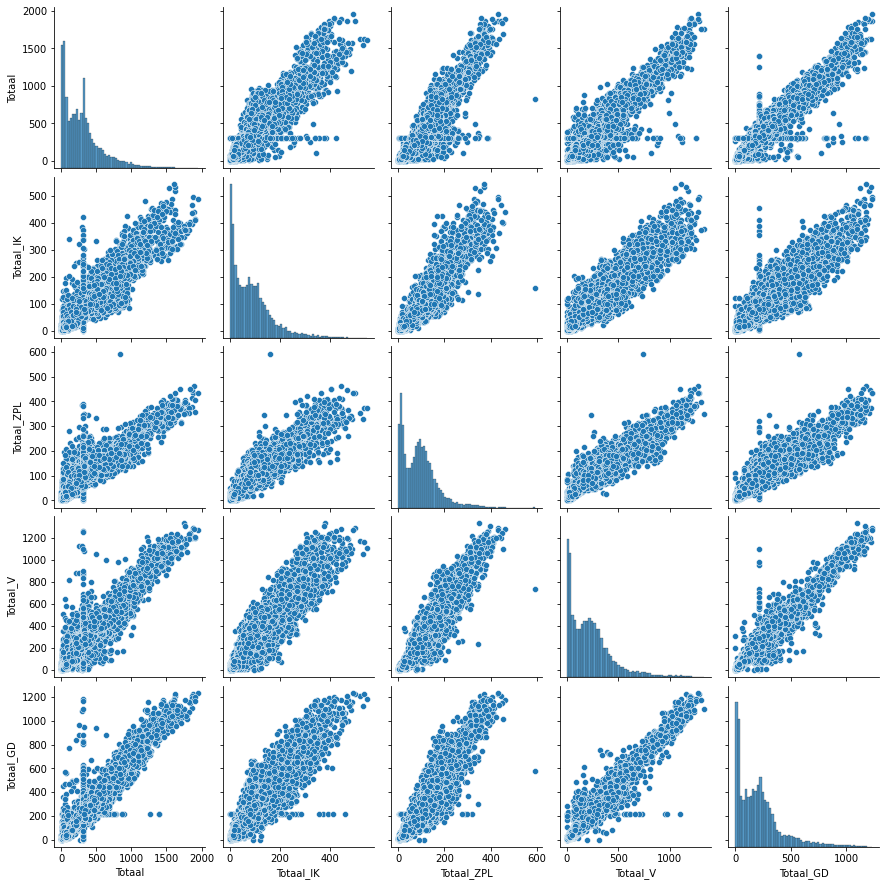

In [67]:
plot_features = list(bicycle_data.filter(regex='^Totaal_', axis=1).columns)
sns.pairplot(train_data.loc[:,["Totaal"] + plot_features])

#### Pairwise Plot: Weather and Temporal

Continuous/discrete weather and temporal features, on the other hand, whilst they do seem to influence the response variable at times, their relationship appears to often be non-linear. For example, low temperatures result in a decline of cyclists, but so do very high temperatures. What's more, only the activity maxima are influenced, as nighttime activity will be more indifferent to temperature fluctuations than daytime activity. This finding incentivizes us to consider employing a non-linear model, such as a tree method.

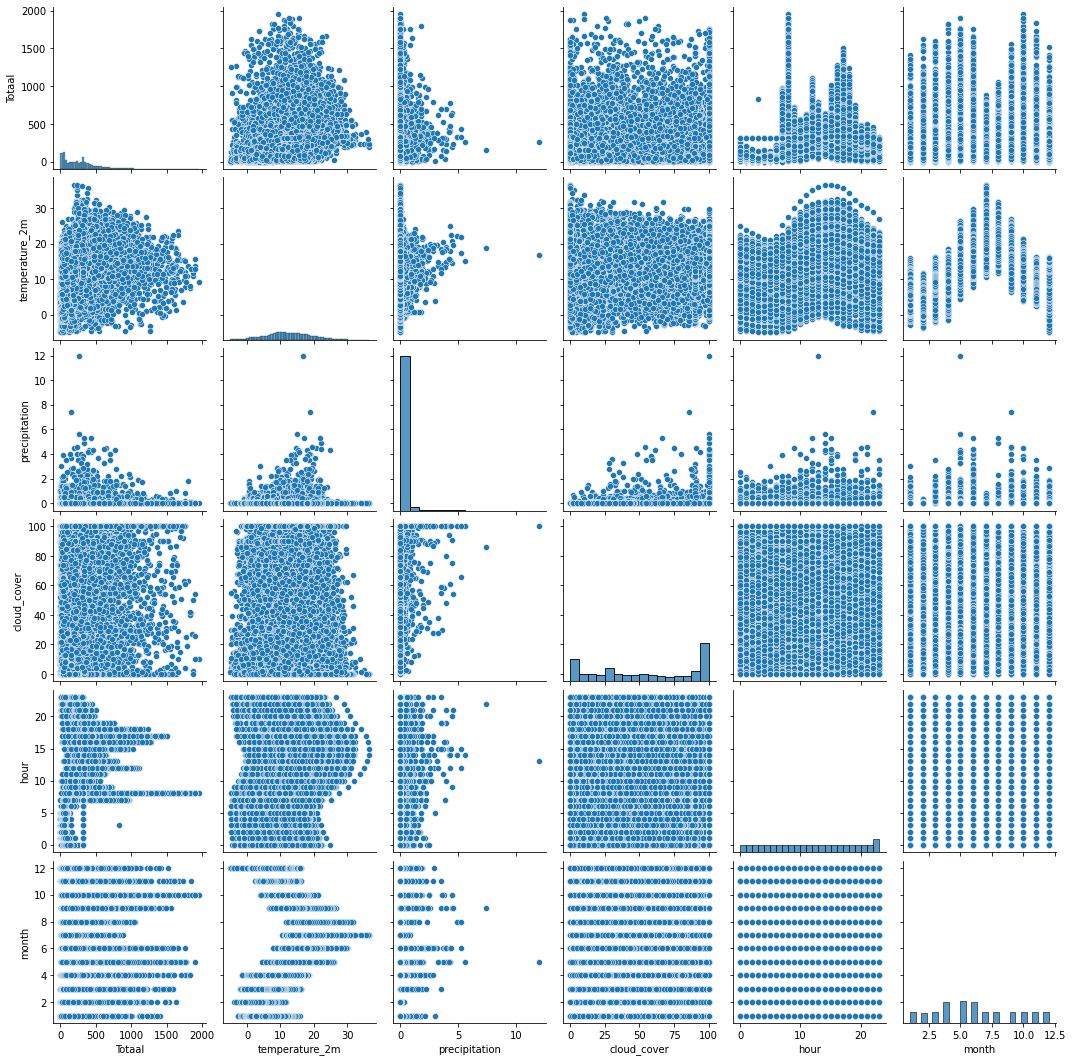

In [68]:
plot_features = ['temperature_2m', 'precipitation', 'cloud_cover', 'hour', 'month']
sns.pairplot(train_data.loc[:,["Totaal"] + plot_features])

#### Pairwise Plot: Booleans

Similarly, we can state for the booleans that the maxima of the response are influenced by the them, but the minima stay indifferent.

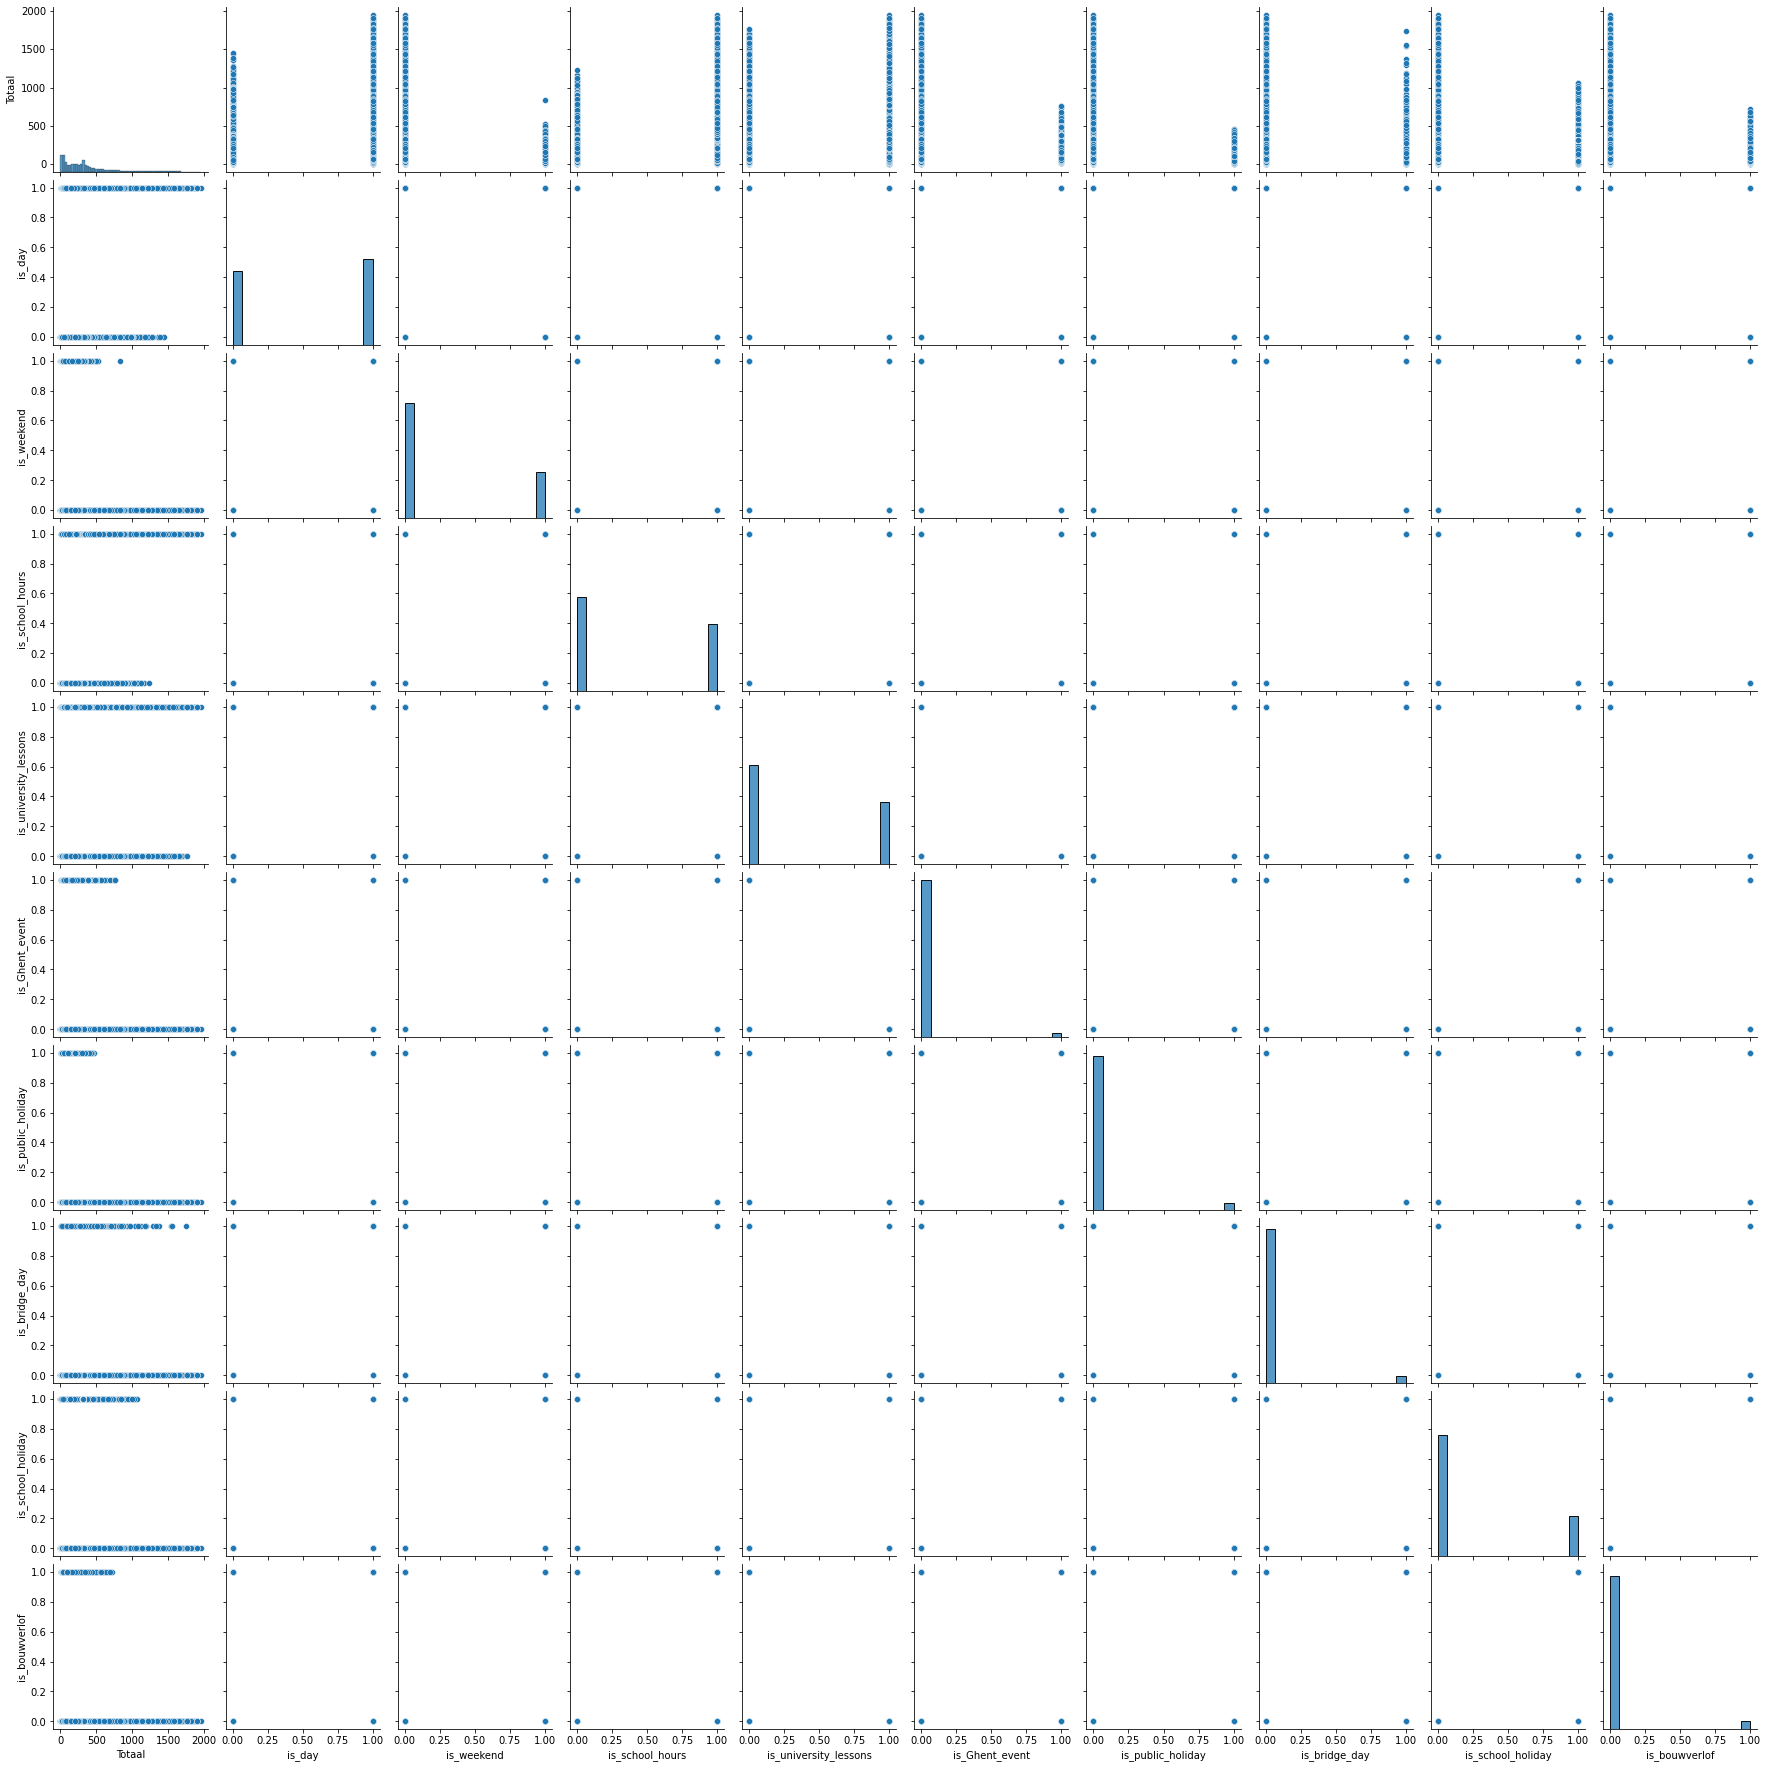

In [69]:
plot_features = ['is_day', 'is_weekend', 'is_school_hours', 'is_university_lessons', 'is_Ghent_event', 'is_public_holiday', 'is_bridge_day', 'is_school_holiday', 'is_bouwverlof']
sns.pairplot(train_data.loc[:, ["Totaal"] + plot_features])

### Interaction

From iterative testing, it was discovered that creating interaction terms from the various (non-lagged) bicycle measurements increased performance. Therefore, pairwise interaction terms are generated for this subset of features and added to the trainig and test set.

In [26]:
poly = PolynomialFeatures(interaction_only=True, include_bias = False)

bike_features = list(bicycle_data.filter(regex='^Totaal_', axis=1).columns)

poly_features = bike_features

train_poly = poly.fit_transform(train_data[poly_features])
test_poly = poly.fit_transform(test_data[poly_features])

interaction_feature_names = poly.get_feature_names_out()
poly_train = pd.DataFrame(train_poly, columns=interaction_feature_names)
poly_test = pd.DataFrame(test_poly, columns=interaction_feature_names)

train_data = pd.concat([train_data.drop(columns=poly_features), poly_train], axis=1)
test_data = pd.concat([test_data.drop(columns=poly_features), poly_test], axis=1)

all_features = list(train_data.select_dtypes(include='number').columns)
elements_to_remove = ["Totaal", "month"]
all_features = [feature for feature in all_features if feature not in elements_to_remove]
print(all_features)

['temperature_2m', 'apparent_temperature', 'precipitation', 'cloud_cover', 'cloud_cover_low', 'cloud_cover_mid', 'cloud_cover_high', 'is_day', 'hour', 'hour_sin', 'hour_cosin', 'is_weekday', 'is_weekend', 'is_school_hours', 'is_university_lessons', 'is_Ghent_event', 'is_public_holiday', 'is_bridge_day', 'is_school_holiday', 'is_bouwverlof', 'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'Fall', 'Spring', 'Summer', 'Winter', 'LaggedTotaal_CL_hour', 'LaggedTotaal_CL_day', 'LaggedTotaal_CL_year', 'Totaal_IK', 'Totaal_ZPL', 'Totaal_V', 'Totaal_GD', 'Totaal_IK Totaal_ZPL', 'Totaal_IK Totaal_V', 'Totaal_IK Totaal_GD', 'Totaal_ZPL Totaal_V', 'Totaal_ZPL Totaal_GD', 'Totaal_V Totaal_GD']


## Model Pipeline Construction

### Model Selection

Many models were tested and compared throughout development, including:

LM
- Linear Regression
- Ridge Regression
- Lasso Regression

GLM
- Poisson Regression
- Negative Binomial Regression
- Tweedie Regression

DT
- Decision Tree Regression

Ensembl
- Random Forest Regression
- Gradient Boosting Regression

Others
- SVM Regression
- Gaussian Process Regression


In the end, ensembl models were the most consistently good, with Gradient Boosting Regression turning out to return the overall best performance. Linear models, especially Ridge Regression, did admirably, but most likely fell short due to some of the underlying non-linear relationships. GLMs such as Poisson Regression models, despite being theoretically sound when considering the count nature of the response, came in just after LMs. This is most likely due to the distribution not perfectly emulating a binomial distribution of any kind, as a result of data imputation and outliers. Running these models with less crude imputation and outlier removal still performed worse than Gradient Boosting Regression regardless, so these methods were dropped. Other methods such as SVR and Gaussian Process Regression were quickly dropped as a result of their high computational dependence with large feature spaces coupled with mediocre performance.

### Feature Normalization

To normalize features, sklearn's StandardScaler is applied to the training and test sets. This function standardizes features by removing the mean and scaling to unit variance. The standard score of a sample x is calculated as:
$$
z = (x - u) / s
$$

u = mean of the training samples

s = standard deviation of the training samples

Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Mean and standard deviation are then stored to be used on later data using transform.

Many elements used in the objective function of a learning algorithm (such as L2 regularizers, which we will be using in our training pipeline) assume that all features are centered around 0 and have variance in the same order. If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.

### Feature Selection

Inherent to ensembl methods is that every feature is given an importance score, by which features are automatically "weighted" in the model. Thus, less important features will already be handled accordingly. Despite this, to reduce computational burden (and because it seems to be advantageous in practice), features are filtered out of the training and test set using Lasso Regression Regularization before the Gradient Boosting Regression model is trained, thus filtering out a number of "bad" features and reducing training time.

### Cross-validation

In practice, it is always advisable to use cross-validation for final model selection. After all, in a real life scenario, one has no access to the true set one wants to predict. Below is an implementation of said cross-validation pipeline. Ideally, we would give an input grid of as many hyperparameter ranges with as high as possible resolution, and have no choice but to accept that the optimal hyperparameters returned will be as close to the best parameters for our test set as we are able to infer based on the knowledge available to us.

However, as we do not have access to a NASA supercomputer, and the competitive nature of the competition, this chunk is but a meager homage to good practice. Ideally, we would range the maximum tree depth, the number of estimators, the learning rate, and more in even tinier increments and across larger ranges, but one must abide by hardware constraints.

In [70]:
X_train = train_data.loc[:, all_features]
y_train = train_data["Totaal"]

selector = make_pipeline(StandardScaler(), SelectFromModel(Lasso()))
selector.fit(X_train, y_train)

model_to_tune = GradientBoostingRegressor()
param_grid = {"max_depth": np.arange(3, 10, 1)}

best_params = nested_kfold_cv(model_to_tune, param_grid, selector.transform(X_train), y_train)

max_depth_GB = best_params["max_depth"]

The mean score using nested cross-validation is: 0.968 ± 0.007
The best parameters found are: {'max_depth': 6}


### Training: Best Cross-Validated Model

In [ ]:
X_train = train_data.loc[:, all_features]
X_test = test_data.loc[:, all_features]

y_train = train_data["Totaal"]
y_test = gtest_data["Totaal"]

pipeline = make_pipeline(StandardScaler(), SelectFromModel(Lasso(alpha = 0.3)), GradientBoostingRegressor(max_depth = 8, 
                                                                                               learning_rate = 0.10, 
                                                                                               n_estimators = 100,
                                                                                               verbose = 0
                                                                                               ))

pipeline.fit(X_train, y_train)

### Predictions: Best Cross-Validated Model

In [ ]:
y_hat_train = pipeline.predict(X_train) # predict training data

y_hat_test = pipeline.predict(X_test) # predict test data

R_train = pipeline.score(X_train, y_train) # Training set R²
R_test = pipeline.score(X_test, y_test) # Test set R²

best_features = X_train.columns[pipeline.named_steps['selectfrommodel'].get_support()]
feature_importances = pipeline.named_steps['gradientboostingregressor'].feature_importances_
feature_matrix = pd.DataFrame(data = {"feature_importances": feature_importances, "best_features": best_features}).sort_values(by = "feature_importances", ascending = False)

print('Train set R²: {}'.format(R_train))
print('Test set R²: {}'.format(R_test))
print(feature_matrix)
print(list(feature_matrix["best_features"]))

save_predictions("GBReg_CV", test_data, y_hat_test)

plot_diff(y_train, y_hat_train, y_test, y_hat_test)

### Training: Best Theoretical Model

To train the model, a pipeline is contructed including the aforementioned scaler, feature selection and model fitting. The hyperparameters were painstakingly varied and curated manually to emulate the best possible theoretical performance for the TEST set, not the regular or cross-validated training set. To be clear, this is NOT good modelling practice. This was done simply in the interest of the competition, to show off this particular model's highest theoretical potential. As explained previously, it would be more correct to instead use hyperparameters obtained from extensive cross-validation. Therefore, for anything besides the purposes of the leaderboard standing, this model is fraudulently trained.

In [31]:
X_train = train_data.loc[:, all_features]
X_test = test_data.loc[:, all_features]

y_train = train_data["Totaal"]
y_test = gtest_data["Totaal"]

pipeline = make_pipeline(StandardScaler(), SelectFromModel(Lasso(alpha = 0.3)), GradientBoostingRegressor(max_depth = 8, 
                                                                                               learning_rate = 0.10, 
                                                                                               n_estimators = 100,
                                                                                               verbose = 0
                                                                                               ))

pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('selectfrommodel',
                 SelectFromModel(estimator=Lasso(alpha=0.3))),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(max_depth=8))])

### Predictions: Best Theoretical Model

Now that the model is trained, we can finally evaluate the results. As expected, the bicycle measurements retained the highest importance scores in the model, with other features such as university lessons, temperature, hour of day, and cloud cover were respectably useful in the construction of the boosted decision trees within the model. From our logarithmic error plots, we conclude that our model mostly overestimates counts in July 2023, most likely due to the summer months being an anomaly compared to the others. One could say that the model is overfitted on the normal working months. This would obviously be easily solved by removing all months but July (and perhaps August) from the training set. However, to keep the model generalizable to future months other than July (as would be the case in a real life scenario), it is opted to keep the training range as large as possible.

Train set R²: 0.9972011850604707
Test set R²: 0.9644486816082628
    feature_importances          best_features
30             0.562533              Totaal_GD
32             0.256764    Totaal_IK Totaal_GD
33             0.077949    Totaal_ZPL Totaal_V
24             0.056528   LaggedTotaal_CL_hour
25             0.007177    LaggedTotaal_CL_day
31             0.004949   Totaal_IK Totaal_ZPL
29             0.003993               Totaal_V
11             0.003439  is_university_lessons
0              0.003397         temperature_2m
7              0.003270               hour_sin
9              0.003137             is_weekday
26             0.002637   LaggedTotaal_CL_year
8              0.002594             hour_cosin
28             0.001896             Totaal_ZPL
27             0.001840              Totaal_IK
6              0.001819                   hour
21             0.000844                 Spring
4              0.000822        cloud_cover_mid
2              0.000622            cloud_c

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


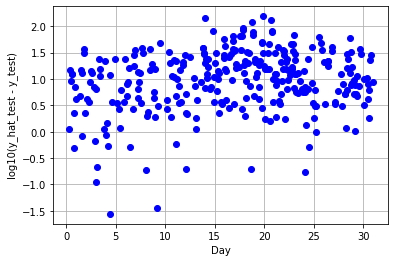

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


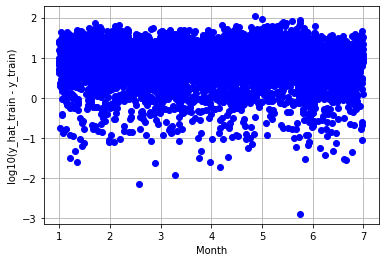

In [32]:
y_hat_train = pipeline.predict(X_train) # predict training data

y_hat_test = pipeline.predict(X_test) # predict test data

R_train = pipeline.score(X_train, y_train) # Training set R²
R_test = pipeline.score(X_test, y_test) # Test set R²

best_features = X_train.columns[pipeline.named_steps['selectfrommodel'].get_support()]
feature_importances = pipeline.named_steps['gradientboostingregressor'].feature_importances_
feature_matrix = pd.DataFrame(data = {"feature_importances": feature_importances, "best_features": best_features}).sort_values(by = "feature_importances", ascending = False)

print('Train set R²: {}'.format(R_train))
print('Test set R²: {}'.format(R_test))
print(feature_matrix)
print(list(feature_matrix["best_features"]))

save_predictions("GBReg_BT", test_data, y_hat_test)

plot_diff(y_train, y_hat_train, y_test, y_hat_test)